In [55]:
# Basic modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image

# Modeling modules
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.convolutional import Conv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


In [46]:
# Generate image class names based on directory's name.
class_names = sorted(os.listdir('plant_images'))
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus']

In [47]:
# create function to view random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_folder)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image chape: (256, 256, 3)


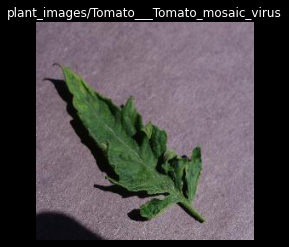

In [48]:
# view random image
img = view_random_image(target_dir= 'plant_images/', target_class='Tomato___Tomato_mosaic_virus')

In [49]:
tf.random.set_seed(46)

# preprocess data 
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
valid_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_dir = 'plant_images'

# Set data generator 
train_data = train_datagen.flow_from_directory(
    train_dir, batch_size =32, target_size = (256,256), class_mode = 'categorical', seed = 46
)
train_data

Found 15915 images belonging to 19 classes.


In [50]:
images , labels = train_data.next()

In [51]:
# Create model architecture with Sequential API
model = Sequential()
model.add(Conv2D(16,3, activation = 'relu', input_shape = (256,256,3)))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))

In [52]:
# Compile data and set configuration for model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train data 
history = model.fit(train_data, epochs=10)

In [ ]:
# Create function plotting for model tracking
def plot_model_eval(data):
    pd.DataFrame(data.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

Image shape: (256, 256, 3)


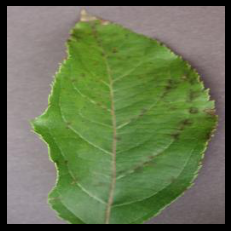

In [61]:
# Get new image 
new_img = Image.open('plant_images/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG')
plt.imshow(new_img)
plt.axis(False);
print(f"Image shape: {img.shape}")

In [ ]:
# Predict new image 
pred = model.predict(new_img)
pred.argmax()

In [ ]:
# Get class names with indices 
train_data.class_indices